In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read data
df=pd.read_csv('Sales_Data.csv')

In [5]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [6]:
# Basic Structure 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


## 🧼 1. Data Cleaning

In [7]:
# Missing values
df.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [9]:
# Drop column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [30]:
# Remove NaNs or duplicates if needed
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [31]:
# Check for dtype issues (e.g., 'Order Date')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

In [11]:
# Change data types
df['Price Each'] = df['Price Each'].astype('int')
df['Sales'] = df['Sales'].astype('int')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  int64 
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  int64 
 3   Price Each        185950 non-null  int64 
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int64 
 7   Sales             185950 non-null  int64 
 8   City              185950 non-null  object
 9   Hour              185950 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 14.2+ MB


## 📊 2. Basic Summary Stats

In [13]:
df.describe()
df['City'].value_counts()
df['Product'].value_counts()

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

## 📅 3. Time-based Analysis

### a. Sales by Month

<Axes: title={'center': 'Monthly Sales'}, xlabel='Month'>

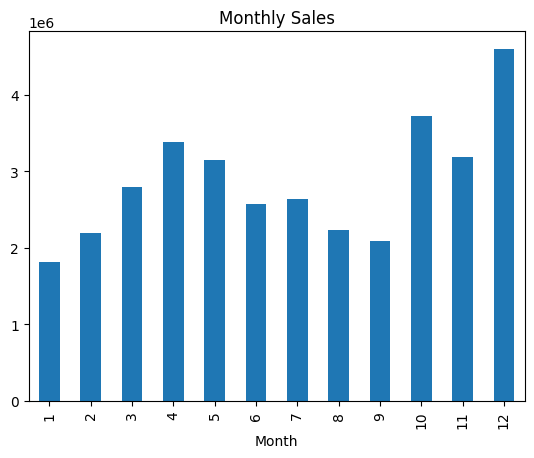

In [14]:
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='bar', title='Monthly Sales')

### b. Sales by Hour

<Axes: title={'center': 'Sales by Hour'}, xlabel='Hour'>

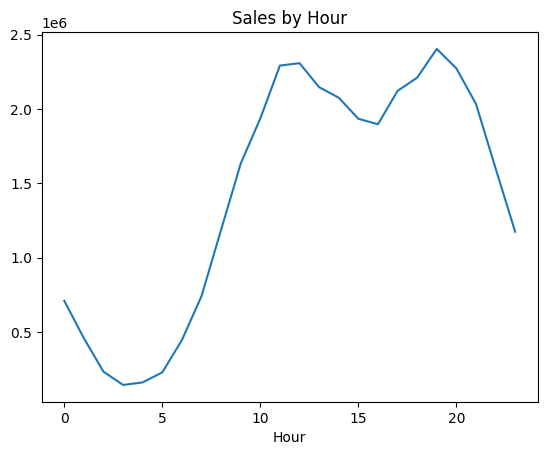

In [15]:
hourly_sales = df.groupby('Hour')['Sales'].sum()
hourly_sales.plot(kind='line', title='Sales by Hour')

## 🏙️ 4. Geographical Analysis

### a. Sales by City

<Axes: title={'center': 'Sales by City'}, xlabel='City'>

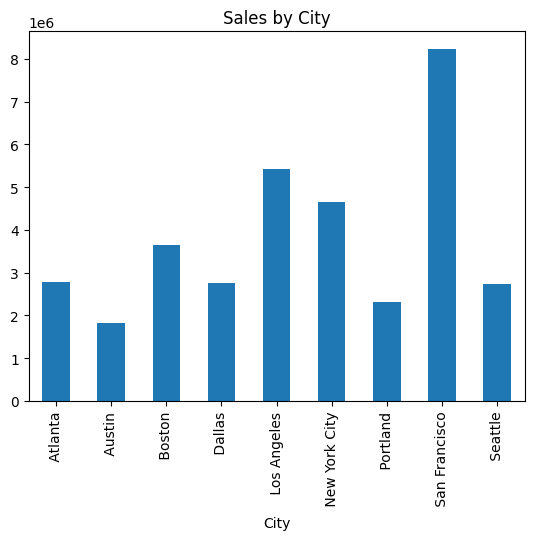

In [16]:
city_sales = df.groupby('City')['Sales'].sum()
city_sales.plot(kind='bar', title='Sales by City')

## 📦 5. Product Analysis

### a. Most Sold Products

<Axes: title={'center': 'Top 10 Products'}, ylabel='Product'>

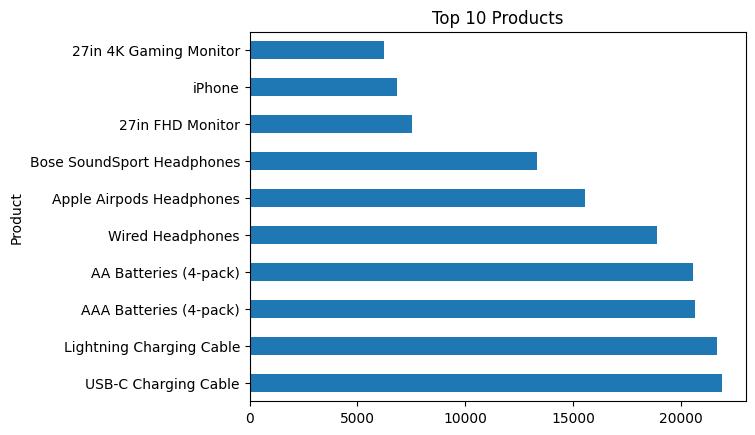

In [17]:
df['Product'].value_counts().head(10).plot(kind='barh', title='Top 10 Products')

## 👥 6. Customer Behavior

### a. What time do customers buy most?

<Axes: title={'center': 'Orders by Hour'}, xlabel='Hour'>

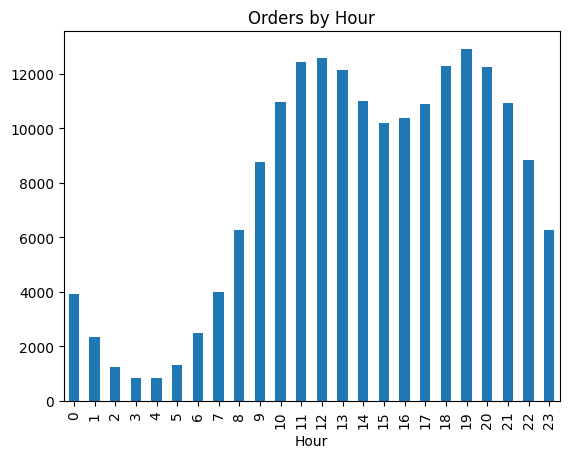

In [18]:
df.groupby('Hour')['Order ID'].count().plot(kind='bar', title='Orders by Hour')

## 🕒 Seaborn Heatmap: Sales by Hour vs City

C:\Users\Technology Zone\AppData\Local\Temp\ipykernel_1620\2002211641.py:8: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Technology Zone\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


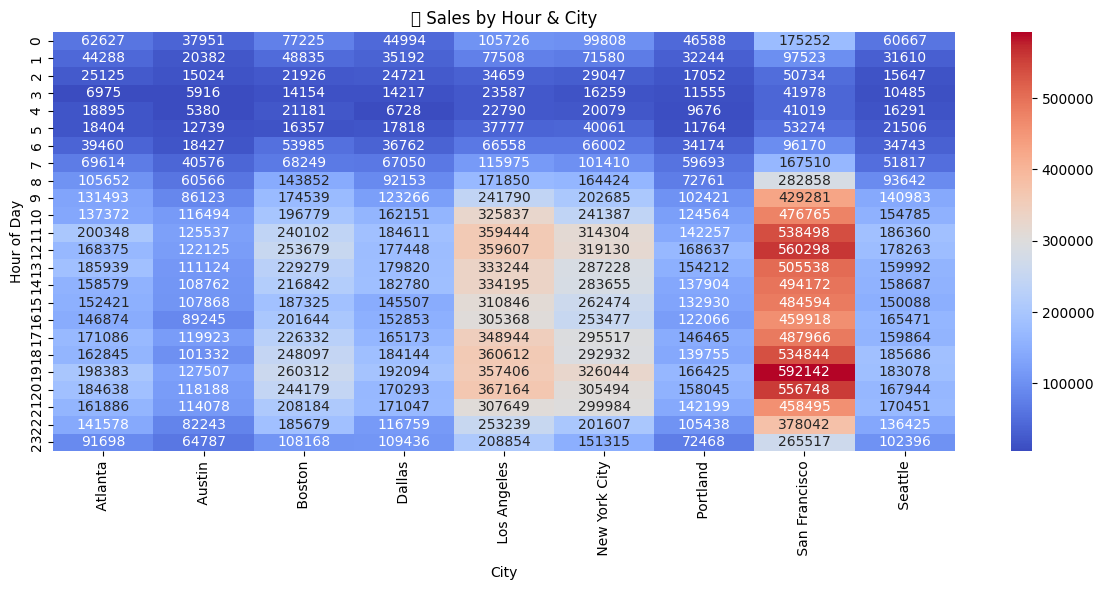

In [19]:

heatmap_data = df.pivot_table(index='Hour', columns='City', values='Sales', aggfunc='sum').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('🔥 Sales by Hour & City')
plt.ylabel('Hour of Day')
plt.xlabel('City')
plt.tight_layout()
plt.show()
